In [22]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from openpyxl import load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows

from CoolProp.HumidAirProp import HAPropsSI
from plot_id import *

plt.rcParams["font.family"] = "Liberation Sans"


In [47]:
path='~/Documents/greenair/python/climate/data/'
file='Ханты-Мансийск.xlsx'
df = pd.read_excel(path+file, skiprows = 6)
title = re.sub('Местное время', 'Погода',df.columns[0])


In [49]:
df['date_time']=pd.to_datetime(df.iloc[:,0], format='%d.%m.%Y %H:%M')
df = df.set_index(pd.DatetimeIndex(df['date_time']))
df = df.drop(['date_time'], axis=1)
df.sort_index(inplace=True)
df['hour'] = df.index.hour
df['dayofyear'] = df.index.dayofyear
df['year'] = df.index.year
df['duration']=df.index.to_series().diff()

In [50]:
df

,Местное время в Ханты-Мансийске (аэропорт),T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,RRR,tR,E,Tg,E',sss,hour,dayofyear,year,duration
date_time,,,,,,,,,,,,,,,,,,,,,
2006-01-01 02:00:00,01.01.2006 02:00,-26.4,779.0,784.0,NaN,75.0,"Ветер, дующий с западо-северо-запада",1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,1,2006,NaT
2006-01-01 05:00:00,01.01.2006 05:00,-26.8,779.6,784.6,NaN,75.0,"Ветер, дующий с западо-северо-запада",2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5,1,2006,03:00:00
2006-01-01 08:00:00,01.01.2006 08:00,-26.7,779.9,785.0,NaN,75.0,"Ветер, дующий с северо-запада",1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,Ровный слой сухого рассыпчатого снега покрывае...,26,8,1,2006,03:00:00
2006-01-01 11:00:00,01.01.2006 11:00,-27.9,780.4,785.6,NaN,NaN,"Штиль, безветрие",0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,11,1,2006,03:00:00
2006-01-01 14:00:00,01.01.2006 14:00,-26.5,780.8,785.8,NaN,75.0,"Штиль, безветрие",0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14,1,2006,03:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 11:00:00,31.12.2018 11:00,-20.4,755.5,760.0,0.0,81.0,"Ветер, дующий с юга",3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,11,365,2018,03:00:00
2018-12-31 14:00:00,31.12.2018 14:00,-18.7,755.6,760.1,0.1,82.0,"Ветер, дующий с юга",3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14,365,2018,03:00:00
2018-12-31 17:00:00,31.12.2018 17:00,-15.7,756.1,760.6,0.5,85.0,"Ветер, дующий с юга",4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,17,365,2018,03:00:00


In [51]:
d = []
h = []
for index, row in df.iterrows():
        try:
                W = HAPropsSI('W','T',row['T']+273.15,'P',101325,'R',row['U']/100)
        except:
                W = np.nan
        try:
                enthalpy = HAPropsSI('H','T',row['T']+273.15,'P',101325,'R',row['U']/100)/1000
        except:
                enthalpy = np.nan
        
        d.append(W)
        h.append(enthalpy)
        
df['d'] = d
df['h'] = h


In [52]:
ds_dur_by_years= df['duration'].groupby(df.index.year).sum()
full_years_list = ds_dur_by_years.index [ds_dur_by_years > np.timedelta64(360,'D')].to_list()
full_years_quantity = len(full_years_list)
print (f'(Замеры за года {full_years_list}\nЗамеры за {full_years_quantity} лет')

(Замеры за года [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Замеры за 13 лет


         num_hours
T                 
-50.0     1.384615
-45.0     8.076923
-40.0    42.000000
-35.0   125.538462
-30.0   260.307692
-25.0          NaN
-20.0   488.769231
-15.0   583.153846
-10.0   785.076923
-5.0    891.230769
-0.0   1197.000000
 5.0   1012.153846
 10.0  1040.076923
 15.0   954.769231
 20.0   635.692308
 25.0   273.461538
 30.0    48.692308
 35.0     0.230769


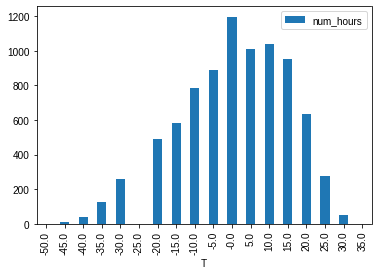

In [53]:
def myround(x, base=5):
    return base * round(x/base)
df_hours_by_temp=df['duration'].groupby(myround(df["T"])).agg(num_hours=('duration', lambda x: (sum(x.dt.components['hours']))/full_years_quantity) )
df_hours_by_temp.plot(kind="bar")
print(df_hours_by_temp)

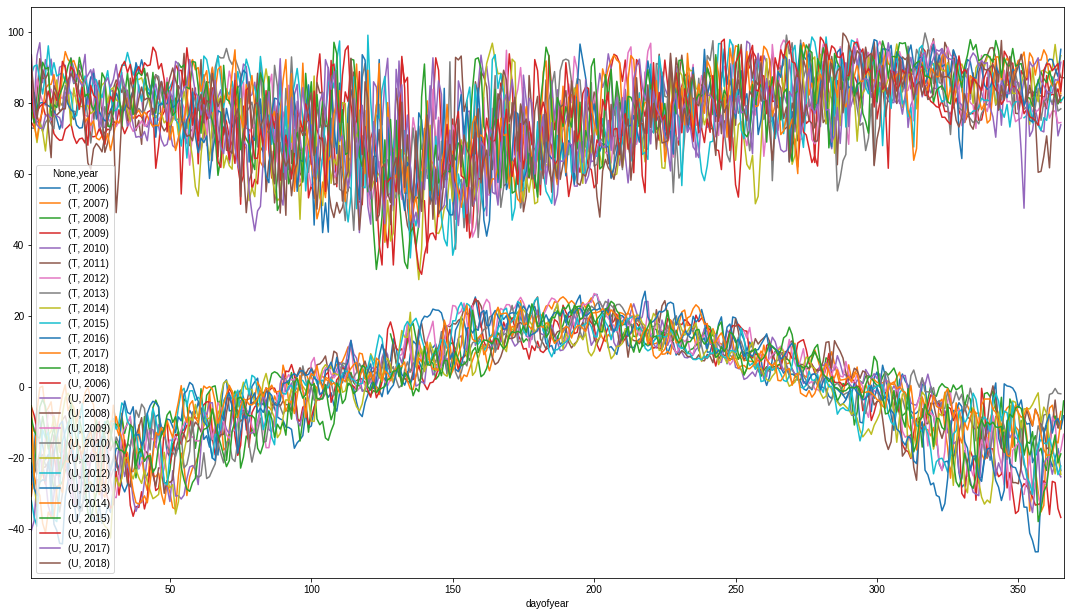

In [57]:
df_T_by_day = pd.pivot_table(df, index=['dayofyear'],columns=['year'], values=['T', 'U'])

fig, ax = plt.subplots() 
fig.set_size_inches(18.5, 10.5)
df_T_by_day.plot(ax=ax)

In [56]:
df.describe()

,T,Po,P,Pa,U,Ff,ff10,ff3,Tn,Tx,Td,tR,Tg,hour,dayofyear,year,duration,d,h
count,38038.000000,38036.000000,38041.000000,17272.000000,37929.000000,38070.000000,593.000000,2148.000000,5021.000000,7133.000000,38047.000000,9322.000000,189.000000,38156.000000,38156.000000,38156.000000,38155,37928.000000,37928.000000
mean,-0.602282,756.635390,761.057467,-0.002461,76.775686,1.971920,11.443508,11.639199,-4.640689,3.082546,-4.614020,11.997533,2.148148,12.506919,181.798171,2012.021465,0 days 02:59:11.314375,0.003944,9.344641
std,14.953803,8.911461,9.067303,1.058805,15.912259,1.268732,1.532507,1.757197,14.423397,15.511845,13.881543,0.136999,4.998857,6.869606,105.900659,3.725721,0 days 00:26:30.250159,0.003345,22.825205
min,-48.000000,718.100000,722.100000,-13.200000,10.000000,0.000000,10.000000,10.000000,-47.800000,-44.500000,-50.700000,1.000000,-22.000000,0.000000,1.000000,2006.000000,0 days 00:00:00,0.000023,-48.214288
25%,-10.800000,750.800000,755.100000,-0.600000,68.000000,1.000000,10.000000,10.000000,-14.700000,-7.700000,-13.600000,12.000000,0.000000,8.000000,89.000000,2009.000000,0 days 03:00:00,0.001195,-7.837931
50%,0.700000,756.000000,760.400000,0.000000,80.000000,2.000000,11.000000,11.000000,-2.300000,4.300000,-2.900000,12.000000,2.000000,14.000000,182.000000,2012.000000,0 days 03:00:00,0.003036,8.970747
75%,11.200000,761.900000,766.400000,0.600000,89.000000,3.000000,12.000000,13.000000,7.000000,15.300000,6.500000,12.000000,4.000000,17.750000,274.000000,2015.000000,0 days 03:00:00,0.006011,26.711877
max,32.600000,793.600000,815.600000,11.100000,100.000000,22.000000,21.000000,24.000000,22.200000,33.000000,25.000000,12.000000,15.000000,23.000000,366.000000,2018.000000,1 days 15:00:00,0.020314,81.876771


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad34ac5128>,
      dtype=object)

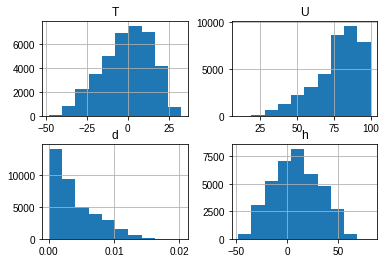

In [74]:
df.hist(['T','U','d','h'])

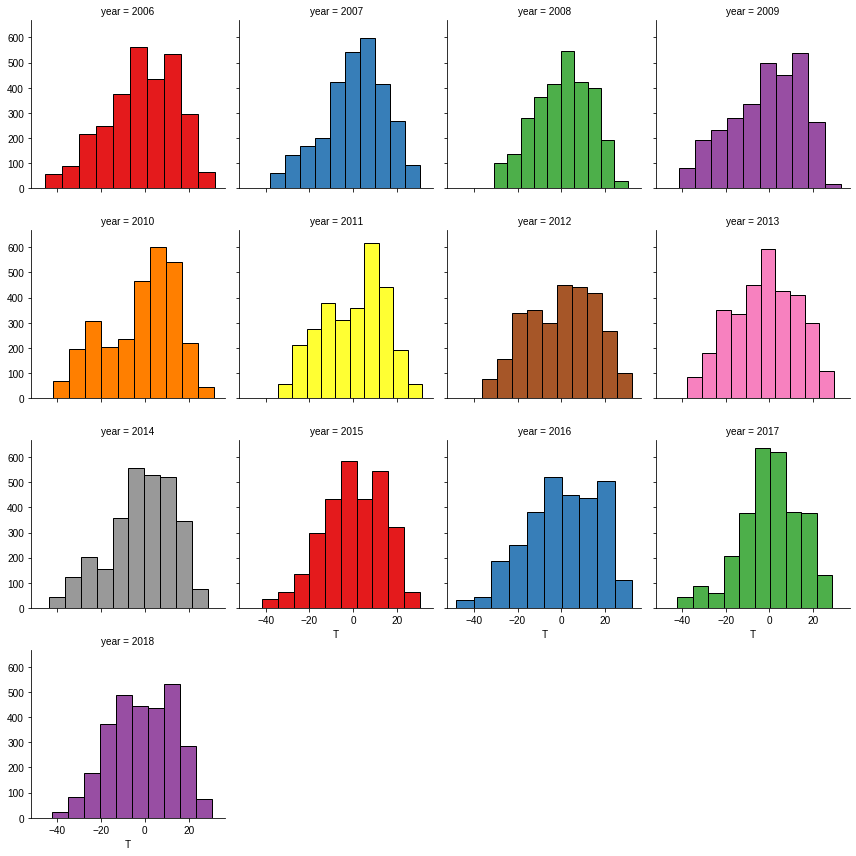

In [66]:
g = sns.FacetGrid(df, col="year", hue="year", palette="Set1", col_wrap=4)
g.map(plt.hist, 'T', ec="k")

In [12]:
title = re.sub('Местное время', 'Погода',df.columns[0])

**Осушение**

In [76]:
t_target  = 21 #degC
rh_target = 60 #%
l_nom     = 11000 #m3/h
ro        = 1.2 #kg/m3
d_drying = HAPropsSI('W','T',t_target+273.15,'P',101325,'R',rh_target/100)
h_drying = HAPropsSI('H','W',d_drying,'P',101325,'R',98/100)/1000

In [77]:
df.loc[:,'Mode']='Нагрев'
df.loc[(df['T']>17),'Mode']='Охлаждение нерабочее'
df.loc[(df['hour']>8)&(df['hour']<19)&(df['T']>17),'Mode']='Охлаждение рабочее'

Text(0.5, 1.0, 'Погода в Ханты-Мансийске (аэропорт)')

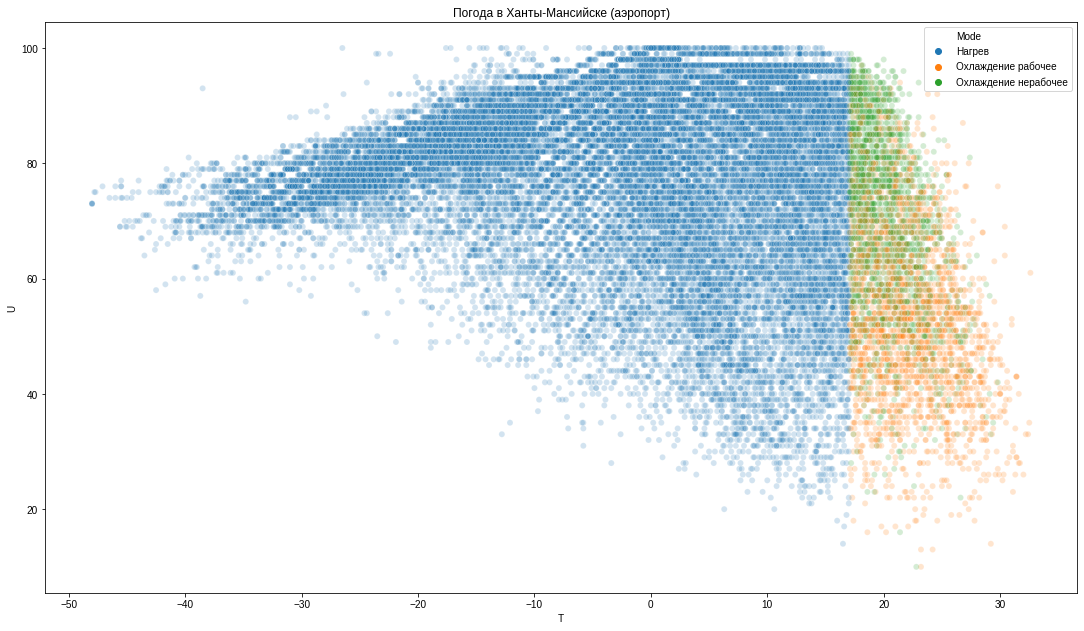

In [81]:
fig, ax = plt.subplots() 
fig.set_size_inches(18.5, 10.5)
sns.scatterplot(y='U',x='T', hue= 'Mode', data=df, alpha=0.2, ax=ax)
ax = plt.gca()
ax.set_title(title)


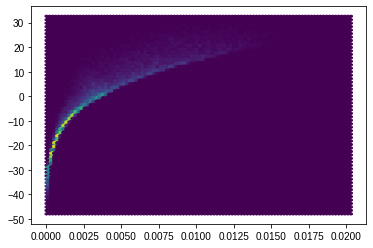

In [79]:
plt.hexbin(x='d', y='T', data=df,  bins=None)

-16
-14
-12
-10
-8
-6
-4
-2
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32


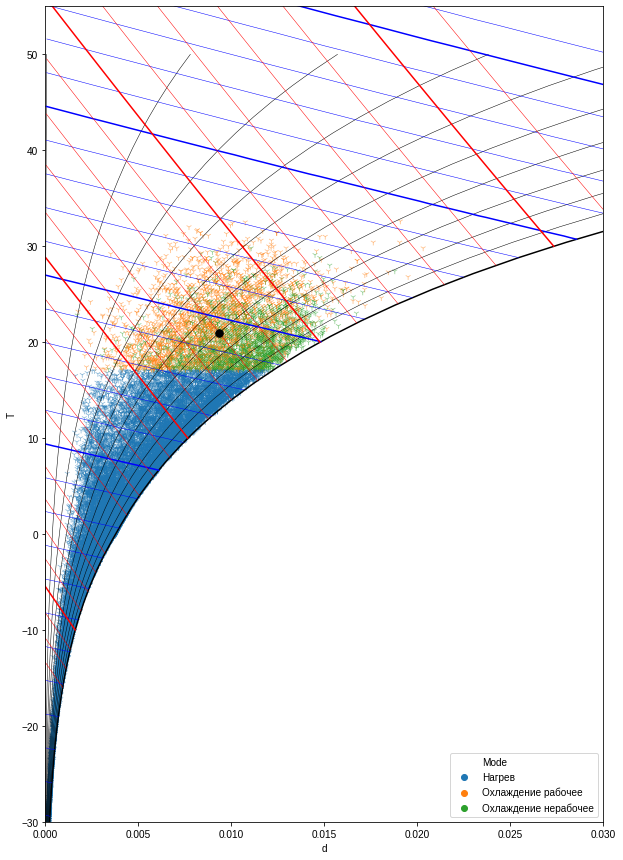

In [82]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 15)
plot_id (ax)
sns.scatterplot(x='d', y='T', hue='Mode', marker = '1', alpha = 0.5, data=df, ax=ax)
#ax.hexbin(x='d', y='T', data=df,  bins=None)
plt.plot([d_drying], [t_target], 'k.', markersize=15.0)
plt.show()

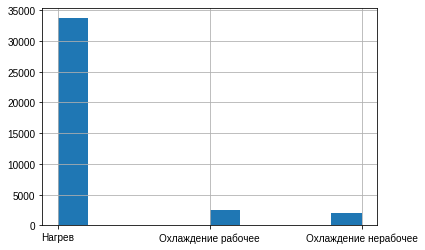

In [97]:
df['Mode'].hist()

In [98]:
def cooling_dry_cap_calc(row):
    if row['Mode'] == 'Осушение':
        cool_cap = l_nom/3600*ro*(row['h']-h_drying)
    else:
        cool_cap = 0
    return cool_cap

df['cooling_dry_cap']= df.apply(cooling_dry_cap_calc, axis = 1)


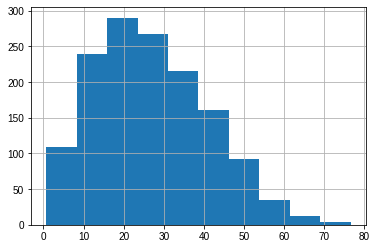

In [127]:
df.loc[df['Mode'] == 'Осушение','cooling_dry_cap'].hist()

Отбрасываем 3% максимальных мощностей и находим максимальную требуемую мощность охладителя, кВт

In [129]:
dryig_periods = df.loc[df['Mode'] == 'Осушение','cooling_dry_cap'].count()
df.loc[df['Mode'] == 'Осушение','cooling_dry_cap'].nlargest(int(dryig_periods*0.03), keep='all').min()

55.41093444339025

In [101]:
df.loc[(df['U']>75) & (df['T']>25),[df.columns[0],'T','U','d']]

,Местное время в Ханты-Мансийске (аэропорт),T,U,d
date_time,,,,
2006-06-15 20:00:00,15.06.2006 20:00,25.4,78.0,0.016010
2006-07-14 20:00:00,14.07.2006 20:00,27.4,81.0,0.018790
2007-06-07 11:00:00,06.07.2007 11:00,25.4,80.0,0.016431
2007-06-07 14:00:00,06.07.2007 14:00,25.4,78.0,0.016010
2007-06-07 17:00:00,06.07.2007 17:00,25.5,83.0,0.017169
2007-09-07 08:00:00,09.07.2007 08:00,25.4,78.0,0.016010
2007-11-07 11:00:00,11.07.2007 11:00,25.6,78.0,0.016206
2007-11-07 14:00:00,11.07.2007 14:00,25.6,78.0,0.016206
2008-12-07 14:00:00,12.07.2008 14:00,26.1,80.0,0.017147


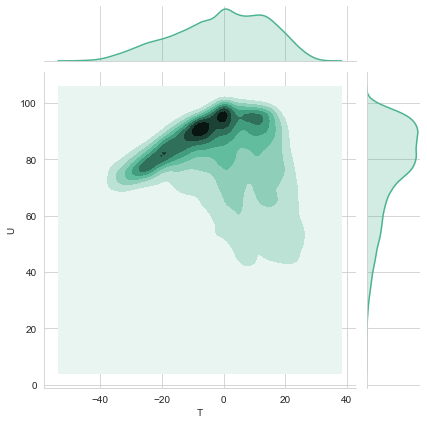

In [129]:
sns.set_style('whitegrid')
sns.jointplot(x='T', y='U', data=df, kind="kde", color="#4CB391")